## eda for titanic prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(df.isnull().sum())
print(test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# df = df.drop('Cabin',axis=1)
test_df = test_df.drop('Cabin',axis=1)

In [9]:
df['Age']  = df['Age'].fillna(df['Age'].mean())


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df = df.drop('Name',axis=1)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
categorical = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
numerical = ['Age', 'Fare']

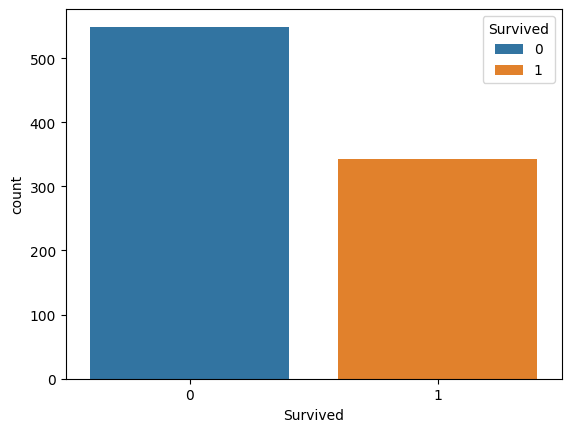

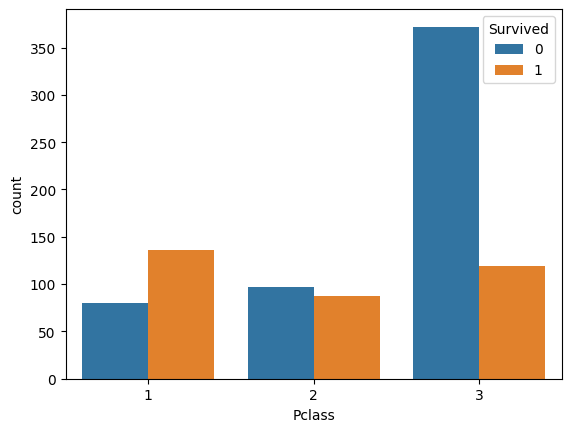

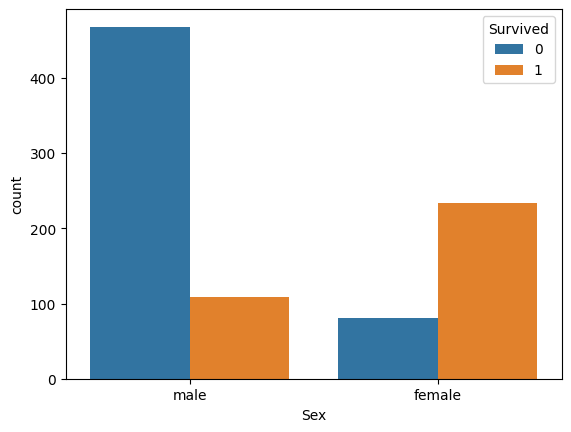

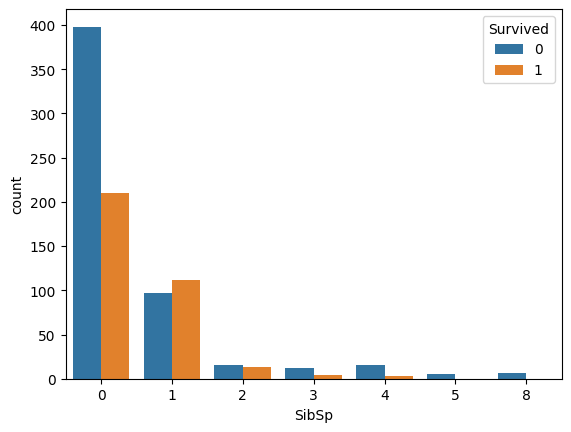

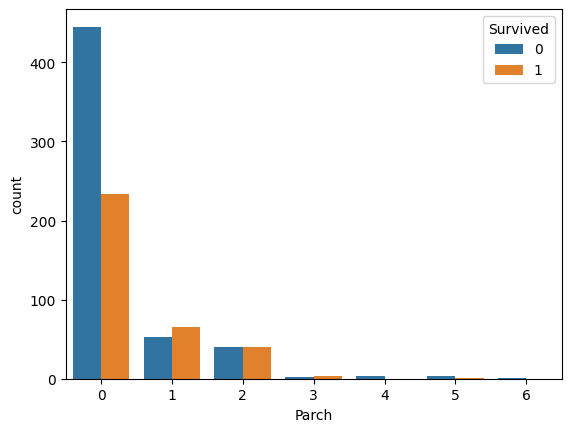

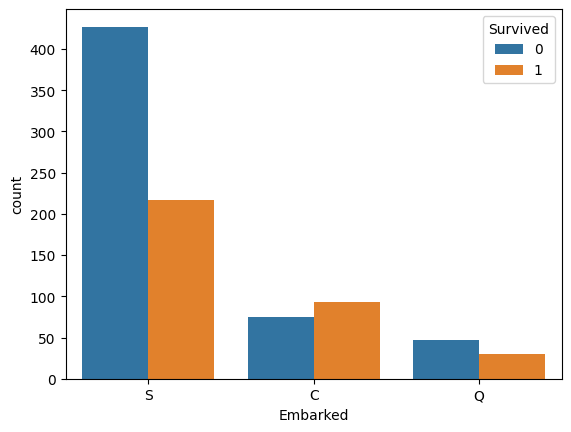

In [14]:
for cat in categorical:
    plt.figure()
    sns.countplot(data = df, x = cat, hue = 'Survived')


// pclass sex Sibsp + Parch Embarked

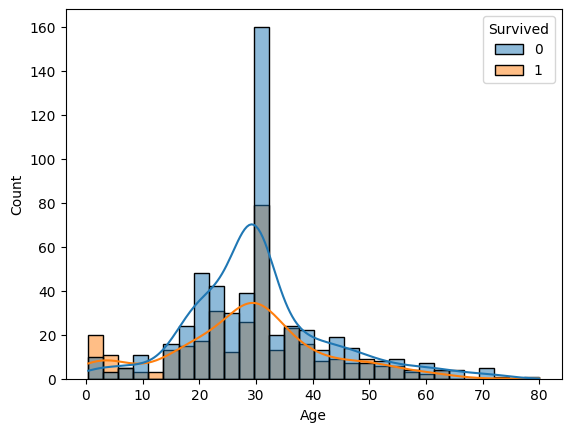

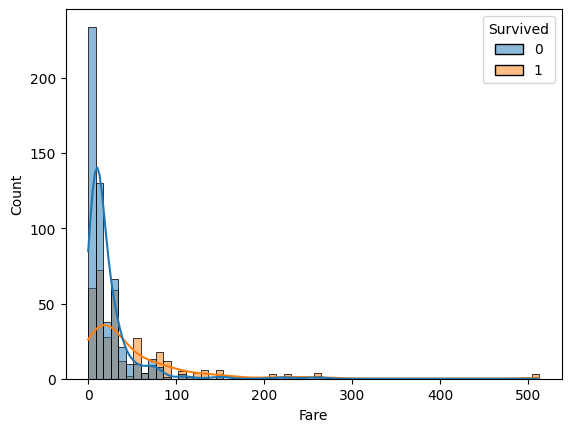

In [15]:
for num in numerical:
    plt.figure()
    sns.histplot(data=df, x = num, hue='Survived',palette='tab10', kde=True)

In [16]:
df[df['Fare'] > 300]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,male,35.0,0,0,PC 17755,512.3292,B101,C


In [17]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median
df.loc[df['Fare'] > upper_bound, 'Fare'] = df['Fare'].median()


<Axes: xlabel='Fare', ylabel='Count'>

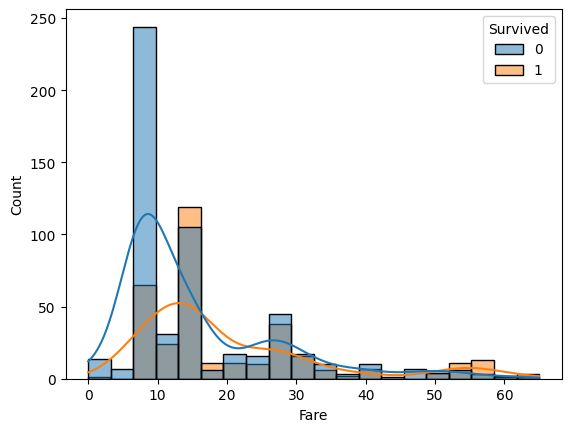

In [18]:
sns.histplot(data=df, x = 'Fare', hue='Survived',palette='tab10', kde=True)

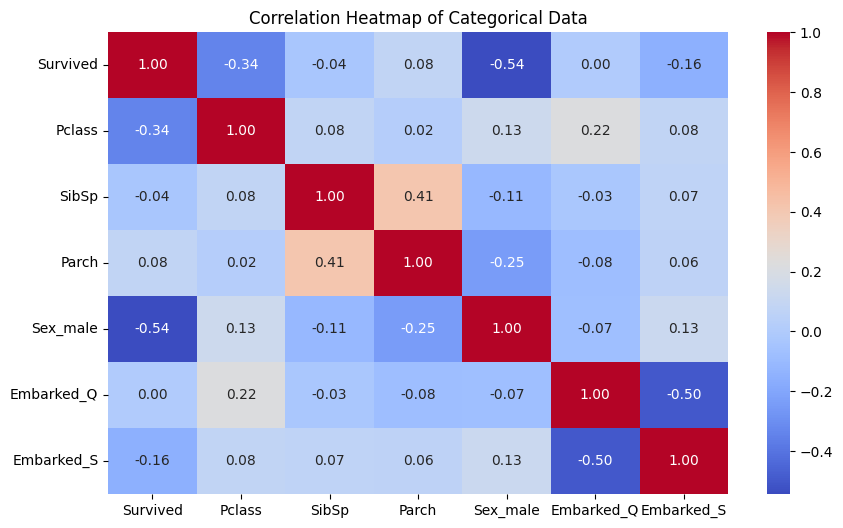

In [19]:
# Encode categorical variables
encoded_df = pd.get_dummies(df[categorical], drop_first=True)

# Calculate correlation matrix
correlation_matrix = encoded_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Categorical Data')
plt.show()

In [20]:
#pclass and sex are most correlated with survived

In [21]:
encoded_df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
encoded_df['IsAlone'] = (encoded_df['FamilySize'] == 1).astype(int)
encoded_df = encoded_df.drop(['Parch','SibSp'],axis=1)

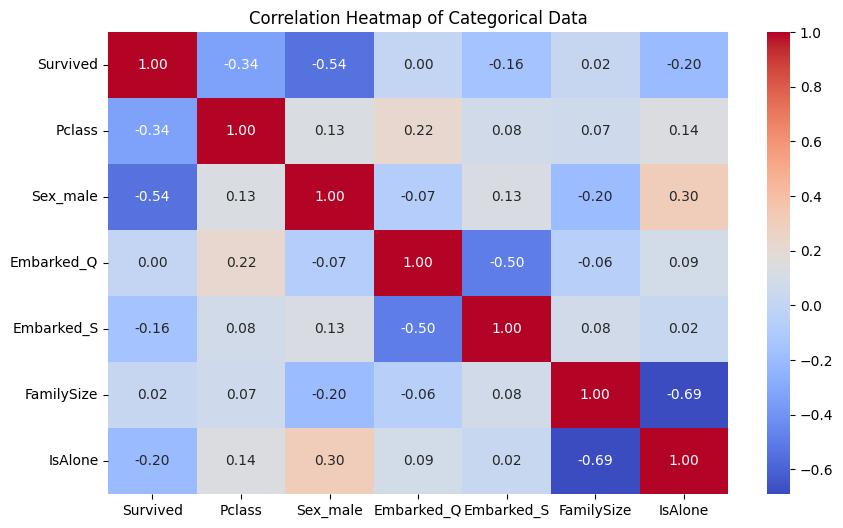

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Categorical Data')
plt.show()

In [23]:
encoded_df.sample(8)

,Survived,Pclass,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
515,0,1,True,False,True,1,1
469,1,3,False,False,False,4,0
80,0,3,True,False,True,1,1
253,0,3,True,False,True,2,0
578,0,3,False,False,False,2,0
478,0,3,True,False,True,1,1
655,0,2,True,False,True,3,0
778,0,3,True,True,False,1,1


In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit_transform(encoded_df)

array([[-0.78927234,  0.82737724,  0.73769513, ...,  0.61930636,
         0.05915988, -1.2316449 ],
       [ 1.2669898 , -1.56610693, -1.35557354, ..., -1.61470971,
         0.05915988, -1.2316449 ],
       [ 1.2669898 ,  0.82737724, -1.35557354, ...,  0.61930636,
        -0.56097483,  0.81192233],
       ...,
       [-0.78927234,  0.82737724, -1.35557354, ...,  0.61930636,
         1.29942929, -1.2316449 ],
       [ 1.2669898 , -1.56610693,  0.73769513, ..., -1.61470971,
        -0.56097483,  0.81192233],
       [-0.78927234,  0.82737724,  0.73769513, ..., -1.61470971,
        -0.56097483,  0.81192233]], shape=(891, 7))

In [28]:
encoded_df.sample(9)

,Survived,Pclass,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
282,0,3,True,False,True,1,1
785,0,3,True,False,True,1,1
376,1,3,False,False,True,1,1
661,0,3,True,False,False,1,1
306,1,1,False,False,False,1,1
257,1,1,False,False,True,1,1
519,0,3,True,False,True,1,1
23,1,1,True,False,True,1,1
228,0,2,True,False,True,1,1


In [29]:
encoded_df = encoded_df.astype(int)

In [30]:
encoded_df.sample(9)
X = encoded_df.drop('Survived',axis=1)
y = encoded_df['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model_lr = LogisticRegression()

In [35]:
model_lr.fit(X, y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [36]:
test_df['Age']  = test_df['Age'].fillna(test_df['Age'].mean())


In [37]:
test_df = test_df.drop('Name',axis=1)


In [38]:
Q1 = test_df['Fare'].quantile(0.25)
Q3 = test_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Replace outliers with median
test_df.loc[test_df['Fare'] > upper_bound, 'Fare'] = test_df['Fare'].median()

In [39]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,male,34.50000,0,0,330911,7.8292,Q
1,893,3,female,47.00000,1,0,363272,7.0000,S
2,894,2,male,62.00000,0,0,240276,9.6875,Q
3,895,3,male,27.00000,0,0,315154,8.6625,S
4,896,3,female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,female,39.00000,0,0,PC 17758,14.4542,C
415,1307,3,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,male,30.27259,0,0,359309,8.0500,S


In [40]:
# Encode categorical variables
passenger_id = test_df['PassengerId']
categorical = ['Pclass','Sex','SibSp','Parch','Embarked']
encoded_df_test = pd.get_dummies(test_df[categorical], drop_first=True)



In [41]:
encoded_df_test

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,3,0,0,True,True,False
1,3,1,0,False,False,True
2,2,0,0,True,True,False
3,3,0,0,True,False,True
4,3,1,1,False,False,True
...,...,...,...,...,...,...
413,3,0,0,True,False,True
414,1,0,0,False,False,False
415,3,0,0,True,False,True
416,3,0,0,True,False,True


In [42]:
encoded_df_test['FamilySize'] = df['SibSp'] + df['Parch'] + 1
encoded_df_test['IsAlone'] = (encoded_df['FamilySize'] == 1).astype(int)
# encoded_df_test = encoded_df_test.drop(['Parch','SibSp'],axis=1)

In [43]:
encoded_df_test = encoded_df_test.drop(['Parch','SibSp'],axis=1)

In [44]:
scaler = StandardScaler()
scaler.fit_transform(encoded_df_test)

array([[ 0.87348191,  0.75592895,  2.84375747, -1.35067551,  0.0169318 ,
        -1.16686842],
       [ 0.87348191, -1.32287566, -0.35164743,  0.74037028,  0.0169318 ,
        -1.16686842],
       [-0.31581919,  0.75592895,  2.84375747, -1.35067551, -0.57285921,
         0.85699465],
       ...,
       [ 0.87348191,  0.75592895, -0.35164743,  0.74037028, -0.57285921,
         0.85699465],
       [ 0.87348191,  0.75592895, -0.35164743,  0.74037028,  0.60672281,
        -1.16686842],
       [ 0.87348191,  0.75592895, -0.35164743, -1.35067551,  0.60672281,
        -1.16686842]], shape=(418, 6))

In [45]:
encoded_df_test = encoded_df_test.astype(int)

In [46]:
final_pred = model_lr.predict(encoded_df_test)

In [47]:
import pandas as pd

submit = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": final_pred
})

submit.to_csv("submission.csv", index=False)


In [48]:
submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [49]:
encoded_df_test

,Pclass,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,3,1,1,0,2,0
1,3,0,0,1,2,0
2,2,1,1,0,1,1
3,3,1,0,1,2,0
4,3,0,0,1,1,1
...,...,...,...,...,...,...
413,3,1,0,1,1,1
414,1,0,0,0,1,1
415,3,1,0,1,1,1
416,3,1,0,1,3,0


In [50]:
y_pred_lr = model_lr.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [53]:
accuracy_lr

0.8101694915254237

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


[[154  21]
 [ 35  85]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       175
           1       0.80      0.71      0.75       120

    accuracy                           0.81       295
   macro avg       0.81      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295



In [57]:
pd.Series(model_lr.coef_[0], index=X.columns).sort_values()


Sex_male     -2.566352
Pclass       -0.845849
IsAlone      -0.739742
Embarked_S   -0.419485
FamilySize   -0.298730
Embarked_Q   -0.095747
dtype: float64